In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from dateutil.relativedelta import relativedelta
from datetime import *

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
import os
os.getcwd()

'C:\\Users\\2180033\\Desktop\\python_begins\\WAVVE'

## 서비스 데이터 읽기 : 69,708 rows, 14 columns
  - Rephurchase 정보 포함

In [4]:
df_service = pd.read_csv('Train/train_service.csv', parse_dates=['registerdate', 'enddate'], infer_datetime_format=True)
df_service.sample(3)

,uno,registerdate,enddate,productcode,pgamount,chargetypeid,concurrentwatchcount,promo_100,coinReceived,Repurchase,devicetypeid,isauth,gender,agegroup
30507,a1fa7a157d4f547c5e56c077134a5d0202553d2c48d550...,2021-03-12 11:02:25,2021-04-12 11:02:25,pk_1489,100.00,190,4,O,NaN,O,android,Y,M,25
59969,8295e7a5ae2ab9f4790483ae305fb414ce34ab8b7b6a64...,2021-03-06 06:31:17,2021-04-06 06:31:17,pk_1136,10.99,140,1,NaN,NaN,O,ios,NaN,NaN,40
64634,1134d2884004c77fdf7bc0654f1705becb54e534d1a11c...,2021-03-02 00:10:24,2021-04-02 00:10:24,pk_1487,100.00,180,1,O,NaN,O,pc,Y,F,30


In [5]:
df_service.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69708 entries, 0 to 69707
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   uno                   69708 non-null  object        
 1   registerdate          69708 non-null  datetime64[ns]
 2   enddate               69708 non-null  datetime64[ns]
 3   productcode           69708 non-null  object        
 4   pgamount              69708 non-null  float64       
 5   chargetypeid          69708 non-null  int64         
 6   concurrentwatchcount  69708 non-null  int64         
 7   promo_100             35729 non-null  object        
 8   coinReceived          12564 non-null  object        
 9   Repurchase            69708 non-null  object        
 10  devicetypeid          69708 non-null  object        
 11  isauth                51727 non-null  object        
 12  gender                58228 non-null  object        
 13  agegroup        

## 서비스 데이터 Unique Value

In [6]:
# Column 별 unique values
for column in df_service.columns.values.tolist():
    unique_value_list = df_service[column].unique()
    print(f'Column <{column}>', len(unique_value_list))
    print(unique_value_list[:10], '\n')

Column <uno> 69145
['b3d6846338d0e98b7e0fcf735c49271ff59df86bfd78f3d75c03d99136f8e0d07bb55627eac3e9a288c20c74cee8641bbdff95108d737b7df108f281d6bbba29'
 '4ec765db76545c1d6dda9f421590bf9d02f584009f8d92100afeef4594ee72306b661c43d19086f82f85f02bbb5716280f52bb7f0fde823a0656a830a0e6e41f'
 '304cacae950e53952afebff0b212f5bfef6a5a0abb4c450879e853055b88063bfc32ee48bea746e952c79f1e1d619db50570991d74d5e19afeb32c5ce1b630dc'
 '4f86d917c53cb6bd8949f76dba7260311e8c1748748a028efd353137a1d459f7c12f6c2af10aec81da39c3bfe8a2d913fd24c26403b0aecba90b11ed2611ad5c'
 '445fb8813626d3d49b94b5be58cd76d80ed31fa94f8372618142c34471e001896e2d3b02a04ad6e2ceb35d91f0305d51eac4ed30a6925db9fcf37d2b8521a2cf'
 'd87ce5040893986019ea58ba1d1df033b8bc6dc03c11634b7bd47c36a5f5c8623993a63f306321dd0f3b69284b006a2643bc4e7ae55d71131389fc176b3db39b'
 '01b16f9f7ff29b48b1ee0d1a89d1eb9662474e5eedb8c2d967ea43793d3f9d03a560771374901302484d7598e771f39abbd8766c54f38753186b3f17eee9fb48'
 '6722de45f1c29af6057973492fed22c05e63a7bc90203d5120b82dc

## 서비스 데이터 결측치 및 이상치 처리

In [7]:
filled_service = df_service

In [8]:
service_missing_info = pd.DataFrame(filled_service.isnull().sum().sort_values(ascending=False), columns=['missing num'])
service_missing_info['%'] = service_missing_info['missing num']/filled_service.shape[0]*100
service_missing_info

,missing num,%
coinReceived,57144,81.976244
promo_100,33979,48.744764
isauth,17981,25.794744
gender,11480,16.468698
agegroup,0,0.000000
devicetypeid,0,0.000000
Repurchase,0,0.000000
concurrentwatchcount,0,0.000000
chargetypeid,0,0.000000
pgamount,0,0.000000


In [9]:
# gender null --> N
filled_service['gender'] = filled_service['gender'].fillna('N')
filled_service['gender'].value_counts()

F    36591
M    21637
N    11480
Name: gender, dtype: int64

In [10]:
# agegroup outlier (0살, 950살) --> mean
filled_service['agegroup'].value_counts().sort_index()

0        608
5          2
10         1
15      1227
20      9562
25     12099
30     10435
35      6905
40     19281
45      3739
50      2725
55      1385
60       885
65       414
70       209
75       129
80        70
85        20
90         9
95         1
120        1
950        1
Name: agegroup, dtype: int64

In [11]:
filled_service.shape

(69708, 14)

In [12]:
age_mean = filled_service.loc[(filled_service['agegroup']<950) & (filled_service['agegroup']>0), 'agegroup'].mean()
age_mean

33.74035803701935

In [13]:
filled_service['agegroup'] = filled_service['agegroup'].replace(950, 30)
filled_service['agegroup'] = filled_service['agegroup'].replace(0, 30)
filled_service['agegroup'].value_counts().sort_index()

5          2
10         1
15      1227
20      9562
25     12099
30     11044
35      6905
40     19281
45      3739
50      2725
55      1385
60       885
65       414
70       209
75       129
80        70
85        20
90         9
95         1
120        1
Name: agegroup, dtype: int64

In [14]:
# pgamount US Dollar --> 원화
filled_service['pgamount'].value_counts().sort_index()

7.69            3
9.89           17
9.99         8313
10.99         266
13.19          12
13.49        2192
14.29          64
16.49         861
17.59           7
18.69           5
19.79           2
20.49           4
20.89           3
21.99           8
24.19           3
26.39           1
27.49           3
29.69           2
32.99           1
100.00      35729
2900.00         2
3350.00        16
3950.00       487
4900.00         9
5450.00       134
5700.00         2
5900.00        38
6210.00        19
6700.00       262
6900.00        99
6950.00       168
7900.00     12679
8100.00         1
8900.00         4
9000.00         9
9200.00         2
9810.00         1
9900.00         5
10300.00        3
10400.00        1
10900.00     5789
11550.00        1
11610.00        1
11800.00        2
12900.00        2
13750.00      119
13900.00     2350
14200.00        1
16400.00        2
16900.00        4
Name: pgamount, dtype: int64

In [15]:
filled_service.loc[(filled_service['pgamount'] < 100), 'pgamount'] = filled_service['pgamount'] * 1120
filled_service['pgamount'].value_counts().sort_index()

100.0      35729
2900.0         2
3350.0        16
3950.0       487
4900.0         9
5450.0       134
5700.0         2
5900.0        38
6210.0        19
6700.0       262
6900.0        99
6950.0       168
7900.0     12679
8100.0         1
8612.8         3
8900.0         4
9000.0         9
9200.0         2
9810.0         1
9900.0         5
10300.0        3
10400.0        1
10900.0     5789
11076.8       17
11188.8     8313
11550.0        1
11610.0        1
11800.0        2
12308.8      266
12900.0        2
13750.0      119
13900.0     2350
14200.0        1
14772.8       12
15108.8     2192
16004.8       64
16400.0        2
16900.0        4
18468.8      861
19700.8        7
20932.8        5
22164.8        2
22948.8        4
23396.8        3
24628.8        8
27092.8        3
29556.8        1
30788.8        3
33252.8        2
36948.8        1
Name: pgamount, dtype: int64

In [16]:
# 나머지 결측치는 X로 처리 (O or null인 경우)
filled_service.isnull().sum()

uno                         0
registerdate                0
enddate                     0
productcode                 0
pgamount                    0
chargetypeid                0
concurrentwatchcount        0
promo_100               33979
coinReceived            57144
Repurchase                  0
devicetypeid                0
isauth                  17981
gender                      0
agegroup                    0
dtype: int64

In [17]:
filled_service = filled_service.fillna('X')
filled_service.isnull().sum()

uno                     0
registerdate            0
enddate                 0
productcode             0
pgamount                0
chargetypeid            0
concurrentwatchcount    0
promo_100               0
coinReceived            0
Repurchase              0
devicetypeid            0
isauth                  0
gender                  0
agegroup                0
dtype: int64

In [18]:
os.getcwd()

'C:\\Users\\2180033\\Desktop\\python_begins\\WAVVE'

In [19]:
filled_service.head(5)

,uno,registerdate,enddate,productcode,pgamount,chargetypeid,concurrentwatchcount,promo_100,coinReceived,Repurchase,devicetypeid,isauth,gender,agegroup
0,b3d6846338d0e98b7e0fcf735c49271ff59df86bfd78f3...,2021-03-09 16:31:15,2021-04-09 16:31:15,pk_1487,7900.0,134,1,X,X,X,android,Y,F,45
1,4ec765db76545c1d6dda9f421590bf9d02f584009f8d92...,2021-03-09 14:33:07,2021-04-09 14:33:07,pk_1487,100.0,190,1,O,O,X,pc,Y,F,25
2,304cacae950e53952afebff0b212f5bfef6a5a0abb4c45...,2021-03-09 12:00:01,2021-04-09 12:00:01,pk_2026,10900.0,151,2,X,O,O,android,Y,F,35
3,4f86d917c53cb6bd8949f76dba7260311e8c1748748a02...,2021-03-09 22:23:12,2021-04-09 22:23:12,pk_1487,100.0,132,1,O,X,X,android,X,F,55
4,445fb8813626d3d49b94b5be58cd76d80ed31fa94f8372...,2021-03-09 10:32:36,2021-04-09 10:32:36,pk_1508,11188.8,140,1,X,X,O,ios,X,N,40


## numeric으로 전환

In [20]:
numeric_service = filled_service.copy()
numeric_service['Repurchase'].replace('O', 0, inplace=True)
numeric_service['Repurchase'].replace('X', 1, inplace=True)
numeric_service.rename(columns={'Repurchase':"Unsubscription"}, inplace=True)
numeric_service.head(5)

,uno,registerdate,enddate,productcode,pgamount,chargetypeid,concurrentwatchcount,promo_100,coinReceived,Unsubscription,devicetypeid,isauth,gender,agegroup
0,b3d6846338d0e98b7e0fcf735c49271ff59df86bfd78f3...,2021-03-09 16:31:15,2021-04-09 16:31:15,pk_1487,7900.0,134,1,X,X,1,android,Y,F,45
1,4ec765db76545c1d6dda9f421590bf9d02f584009f8d92...,2021-03-09 14:33:07,2021-04-09 14:33:07,pk_1487,100.0,190,1,O,O,1,pc,Y,F,25
2,304cacae950e53952afebff0b212f5bfef6a5a0abb4c45...,2021-03-09 12:00:01,2021-04-09 12:00:01,pk_2026,10900.0,151,2,X,O,0,android,Y,F,35
3,4f86d917c53cb6bd8949f76dba7260311e8c1748748a02...,2021-03-09 22:23:12,2021-04-09 22:23:12,pk_1487,100.0,132,1,O,X,1,android,X,F,55
4,445fb8813626d3d49b94b5be58cd76d80ed31fa94f8372...,2021-03-09 10:32:36,2021-04-09 10:32:36,pk_1508,11188.8,140,1,X,X,0,ios,X,N,40


In [21]:
numeric_service.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69708 entries, 0 to 69707
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   uno                   69708 non-null  object        
 1   registerdate          69708 non-null  datetime64[ns]
 2   enddate               69708 non-null  datetime64[ns]
 3   productcode           69708 non-null  object        
 4   pgamount              69708 non-null  float64       
 5   chargetypeid          69708 non-null  int64         
 6   concurrentwatchcount  69708 non-null  int64         
 7   promo_100             69708 non-null  object        
 8   coinReceived          69708 non-null  object        
 9   Unsubscription        69708 non-null  int64         
 10  devicetypeid          69708 non-null  object        
 11  isauth                69708 non-null  object        
 12  gender                69708 non-null  object        
 13  agegroup        

In [22]:
column_list = numeric_service.columns.values.tolist()
column_list.remove('uno')
column_list.remove('productcode')

for col in column_list:
    if numeric_service[col].dtype == 'object':
        lbl = LabelEncoder()
        lbl.fit(list(numeric_service[col].values))
        numeric_service[col] = lbl.transform(numeric_service[col].values)
        
numeric_service.sample(5)

,uno,registerdate,enddate,productcode,pgamount,chargetypeid,concurrentwatchcount,promo_100,coinReceived,Unsubscription,devicetypeid,isauth,gender,agegroup
35578,517e3d26c4fc035edc383d743a9effa9d5816bf2a49b77...,2021-03-07 17:22:10,2021-04-07 17:22:10,pk_1487,100.0,134,1,0,0,0,0,1,1,40
11551,f3a767c7d9c2644fe8339164f0ba611b74a762af29f69b...,2021-03-01 20:25:37,2021-04-01 20:25:37,pk_2025,7900.0,151,1,1,1,0,0,1,0,25
17078,f73a249dc6569b5c999407a1c0ac4270bcfa04001a30b3...,2021-03-05 22:06:10,2021-04-05 22:06:10,pk_1487,100.0,132,1,0,1,0,7,1,0,20
36733,e710eef847ce8605c3190add7ed2f82a3316841726282e...,2021-03-06 11:38:07,2021-04-06 11:38:07,pk_1507,18468.8,140,4,1,1,0,1,0,2,40
27469,eca9cd48bfdab47c489d66856d35bb208b2bbdad1d549a...,2021-03-09 21:51:11,2021-04-09 21:51:11,pk_1508,11188.8,140,1,1,1,1,1,0,2,40


In [23]:
numeric_service.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69708 entries, 0 to 69707
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   uno                   69708 non-null  object        
 1   registerdate          69708 non-null  datetime64[ns]
 2   enddate               69708 non-null  datetime64[ns]
 3   productcode           69708 non-null  object        
 4   pgamount              69708 non-null  float64       
 5   chargetypeid          69708 non-null  int64         
 6   concurrentwatchcount  69708 non-null  int64         
 7   promo_100             69708 non-null  int32         
 8   coinReceived          69708 non-null  int32         
 9   Unsubscription        69708 non-null  int64         
 10  devicetypeid          69708 non-null  int32         
 11  isauth                69708 non-null  int32         
 12  gender                69708 non-null  int32         
 13  agegroup        

## numeric_service 저장

In [24]:
# numeric_service.to_csv(path_or_buf="Train/numeric_service.csv", index=False)

## numeric_service 불러오기

In [25]:
# numeric_service = pd.read_csv("Train/numeric_service.csv")

In [26]:
# numeric_service

In [27]:
# numeric_service.columns

In [28]:
numeric_service.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69708 entries, 0 to 69707
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   uno                   69708 non-null  object        
 1   registerdate          69708 non-null  datetime64[ns]
 2   enddate               69708 non-null  datetime64[ns]
 3   productcode           69708 non-null  object        
 4   pgamount              69708 non-null  float64       
 5   chargetypeid          69708 non-null  int64         
 6   concurrentwatchcount  69708 non-null  int64         
 7   promo_100             69708 non-null  int32         
 8   coinReceived          69708 non-null  int32         
 9   Unsubscription        69708 non-null  int64         
 10  devicetypeid          69708 non-null  int32         
 11  isauth                69708 non-null  int32         
 12  gender                69708 non-null  int32         
 13  agegroup        

## 시청 이력 데이터 읽기 : 7,987,609 rows

In [29]:
df_bookmark = pd.read_csv("Train/train_bookmark.csv", parse_dates=['dates'], infer_datetime_format=True)


In [30]:
ex_uno = df_bookmark.loc[0, 'uno']
df_bookmark[df_bookmark['uno']==ex_uno]

,uno,dates,hour,channeltype,programid,title,contentid,contentnumber,section,viewtime,devicetype
0,b3d6846338d0e98b7e0fcf735c49271ff59df86bfd78f3...,2021-03-20,17,V,S01_P453505934,펜트하우스 2,S01_E454434900.1,9,1,1650,4
1,b3d6846338d0e98b7e0fcf735c49271ff59df86bfd78f3...,2021-03-13,15,V,M_T60403G,밥이 되어라,M_EP202103053628.1,42,1,1670,4
2,b3d6846338d0e98b7e0fcf735c49271ff59df86bfd78f3...,2021-03-13,6,V,S01_P453505934,펜트하우스 2,S01_E454336041.1,7,1,1800,4
3,b3d6846338d0e98b7e0fcf735c49271ff59df86bfd78f3...,2021-03-16,19,V,K02_T2020-0370,오! 삼광빌라!,K02_PS-2021033047-01-000.1,50,1,2080,4
4,b3d6846338d0e98b7e0fcf735c49271ff59df86bfd78f3...,2021-03-18,7,V,M_T60403G,밥이 되어라,M_EP202103123716.1,43,1,1680,4
5,b3d6846338d0e98b7e0fcf735c49271ff59df86bfd78f3...,2021-03-12,6,V,S01_P453505934,펜트하우스 2,S01_E454130151.1,4,1,10,4
6,b3d6846338d0e98b7e0fcf735c49271ff59df86bfd78f3...,2021-03-14,10,V,K02_T2020-0370,오! 삼광빌라!,K02_PS-2021033047-01-000.1,50,1,1290,4
7,b3d6846338d0e98b7e0fcf735c49271ff59df86bfd78f3...,2021-03-28,7,V,S01_P453505934,펜트하우스 2,S01_E454542949.1,12,1,480,4
8,b3d6846338d0e98b7e0fcf735c49271ff59df86bfd78f3...,2021-03-13,9,V,S01_P453505934,펜트하우스 2,S01_E454229316.1,5,1,40,4
9,b3d6846338d0e98b7e0fcf735c49271ff59df86bfd78f3...,2021-03-12,5,V,S01_P453505934,펜트하우스 2,S01_E454229327.1,6,1,1720,4


In [31]:
df_bookmark.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824112 entries, 0 to 7824111
Data columns (total 11 columns):
 #   Column         Dtype         
---  ------         -----         
 0   uno            object        
 1   dates          datetime64[ns]
 2   hour           int64         
 3   channeltype    object        
 4   programid      object        
 5   title          object        
 6   contentid      object        
 7   contentnumber  object        
 8   section        object        
 9   viewtime       int64         
 10  devicetype     int64         
dtypes: datetime64[ns](1), int64(3), object(7)
memory usage: 656.6+ MB


## 시청 이력 데이터 Unique Value

In [32]:
for column in df_bookmark.columns.values.tolist():
    unique_value_list = df_bookmark[column].unique()
    print(f'Column <{column}>', len(unique_value_list))
    print(unique_value_list[:10], '\n')

Column <uno> 67306
['b3d6846338d0e98b7e0fcf735c49271ff59df86bfd78f3d75c03d99136f8e0d07bb55627eac3e9a288c20c74cee8641bbdff95108d737b7df108f281d6bbba29'
 '4ec765db76545c1d6dda9f421590bf9d02f584009f8d92100afeef4594ee72306b661c43d19086f82f85f02bbb5716280f52bb7f0fde823a0656a830a0e6e41f'
 '304cacae950e53952afebff0b212f5bfef6a5a0abb4c450879e853055b88063bfc32ee48bea746e952c79f1e1d619db50570991d74d5e19afeb32c5ce1b630dc'
 '4f86d917c53cb6bd8949f76dba7260311e8c1748748a028efd353137a1d459f7c12f6c2af10aec81da39c3bfe8a2d913fd24c26403b0aecba90b11ed2611ad5c'
 '445fb8813626d3d49b94b5be58cd76d80ed31fa94f8372618142c34471e001896e2d3b02a04ad6e2ceb35d91f0305d51eac4ed30a6925db9fcf37d2b8521a2cf'
 'd87ce5040893986019ea58ba1d1df033b8bc6dc03c11634b7bd47c36a5f5c8623993a63f306321dd0f3b69284b006a2643bc4e7ae55d71131389fc176b3db39b'
 '01b16f9f7ff29b48b1ee0d1a89d1eb9662474e5eedb8c2d967ea43793d3f9d03a560771374901302484d7598e771f39abbd8766c54f38753186b3f17eee9fb48'
 '6722de45f1c29af6057973492fed22c05e63a7bc90203d5120b82dc

## 시청 이력 데이터 가공

In [33]:
# (1) 고객별 서비스 가입 이력 수
df_feature_1 = numeric_service.groupby(by='uno', as_index=False).registerdate.count()
df_feature_1.rename(columns={'registerdate':'REG_CNT'}, inplace=True)

# (2) 고객별 서비스 가입 이력 상품 수
df_feature_2 = numeric_service[['uno','productcode']]
df_feature_2 = numeric_service.drop_duplicates() # 고객별 동일 상품 제거
df_feature_2 = numeric_service.groupby(by='uno', as_index=False).productcode.count()
df_feature_2.rename(columns={'productcode':'PRD_CNT'}, inplace=True)

# (3) 고객별 시청 건수 (1시간 단위)
df_feature_3 = df_bookmark.groupby(by='uno', as_index=False).dates.count()
df_feature_3.rename(columns={'dates':'BM_CNT'}, inplace=True)

# (4) 고객별 시청 총 시간
df_feature_4 = df_bookmark.groupby(by='uno', as_index=False).viewtime.sum()
df_feature_4.rename(columns={'viewtime':'VT_TOT'}, inplace=True)

# (5) 고객별 시청 평균 시간
df_feature_5 = df_bookmark.groupby(by='uno', as_index=False).viewtime.mean()
df_feature_5.rename(columns={'viewtime':'VT_AVG'}, inplace=True)

# (6) 고객별 시청 채널 수
df_feature_6 = df_bookmark[['uno','channeltype']]
df_feature_6 = df_feature_6.drop_duplicates() # 고객별 동일 채널 제거
df_feature_6 = df_feature_6.groupby(by='uno', as_index=False).channeltype.count()
df_feature_6.rename(columns={'channeltype':'CH_CNT'}, inplace=True)

# (7) 고객별 시청 프로그램 수
df_feature_7 = df_bookmark[['uno','programid']]
df_feature_7 = df_feature_7.drop_duplicates() # 고객별 동일 프로그램 제거
df_feature_7 = df_feature_7.groupby(by='uno', as_index=False).programid.count()
df_feature_7.rename(columns={'programid':'PRG_CNT'}, inplace=True)

# (8) 고객별 시청 디바이스 수
df_feature_8 = df_bookmark[['uno','devicetype']]
df_feature_8 = df_feature_8.drop_duplicates() # 고객별 동일 프로그램 제거
df_feature_8 = df_feature_8.groupby(by='uno', as_index=False).devicetype.count()
df_feature_8.rename(columns={'devicetype':'DEV_CNT'}, inplace=True)

In [102]:
# (9) enddate - registerdate
df_feature_9 = numeric_service[['uno', 'enddate', 'registerdate', 'Unsubscription']]
df_feature_9['REG_END'] = df_feature_9['enddate'] - df_feature_9['registerdate']
df_feature_9 = df_feature_9[['uno', 'registerdate', 'REG_END']]
df_feature_9['REG_END'] = df_feature_9['REG_END'].astype('str')
df_feature_9['REG_END'] = df_feature_9.REG_END.str.split(' days').str[0]
df_feature_9['REG_END'] = df_feature_9['REG_END'].astype('int')

<ipython-input-102-737c52ea260e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_feature_9['REG_END'] = df_feature_9['enddate'] - df_feature_9['registerdate']


In [104]:
service_bookmark = numeric_service.copy()
feature_list = [df_feature_1, df_feature_2, df_feature_3, df_feature_4, 
                df_feature_5, df_feature_6, df_feature_7, df_feature_8]

for feature in feature_list:
    service_bookmark = pd.merge(service_bookmark, feature, on="uno", how='left')
    
service_bookmark = pd.merge(service_bookmark, df_feature_9, on=["uno", 'registerdate'], how='left')
    
print(service_bookmark.columns)
print(len(service_bookmark))
print(len(numeric_service))

Index(['uno', 'registerdate', 'enddate', 'productcode', 'pgamount',
       'chargetypeid', 'concurrentwatchcount', 'promo_100', 'coinReceived',
       'Unsubscription', 'devicetypeid', 'isauth', 'gender', 'agegroup',
       'REG_CNT', 'PRD_CNT', 'BM_CNT', 'VT_TOT', 'VT_AVG', 'CH_CNT', 'PRG_CNT',
       'DEV_CNT', 'REG_END'],
      dtype='object')
69708
69708


In [105]:
service_bookmark.isna().sum()

uno                        0
registerdate               0
enddate                    0
productcode                0
pgamount                   0
chargetypeid               0
concurrentwatchcount       0
promo_100                  0
coinReceived               0
Unsubscription             0
devicetypeid               0
isauth                     0
gender                     0
agegroup                   0
REG_CNT                    0
PRD_CNT                    0
BM_CNT                  1849
VT_TOT                  1849
VT_AVG                  1849
CH_CNT                  1849
PRG_CNT                 1849
DEV_CNT                 1849
REG_END                    0
dtype: int64

In [106]:
service_bookmark['BM_CNT'] = service_bookmark['BM_CNT'].fillna(0)
service_bookmark['VT_TOT'] = service_bookmark['VT_TOT'].fillna(0)
service_bookmark['VT_AVG'] = service_bookmark['VT_AVG'].fillna(0)
service_bookmark['CH_CNT'] = service_bookmark['CH_CNT'].fillna(0)
service_bookmark['PRG_CNT'] = service_bookmark['PRG_CNT'].fillna(0)
service_bookmark['DEV_CNT'] = service_bookmark['DEV_CNT'].fillna(0)

In [107]:
service_bookmark.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69708 entries, 0 to 69707
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   uno                   69708 non-null  object        
 1   registerdate          69708 non-null  datetime64[ns]
 2   enddate               69708 non-null  datetime64[ns]
 3   productcode           69708 non-null  object        
 4   pgamount              69708 non-null  float64       
 5   chargetypeid          69708 non-null  int64         
 6   concurrentwatchcount  69708 non-null  int64         
 7   promo_100             69708 non-null  int32         
 8   coinReceived          69708 non-null  int32         
 9   Unsubscription        69708 non-null  int64         
 10  devicetypeid          69708 non-null  int32         
 11  isauth                69708 non-null  int32         
 12  gender                69708 non-null  int32         
 13  agegroup        

## Correlation

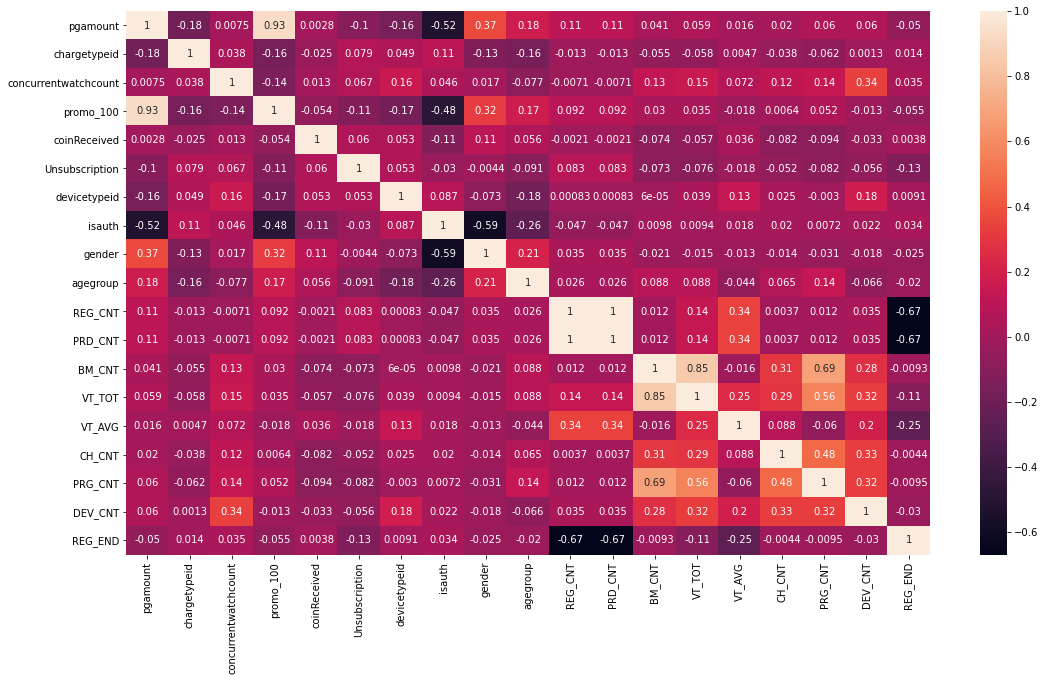

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.figure(figsize=(18,10))
sns.heatmap(service_bookmark.corr(), annot=True)   

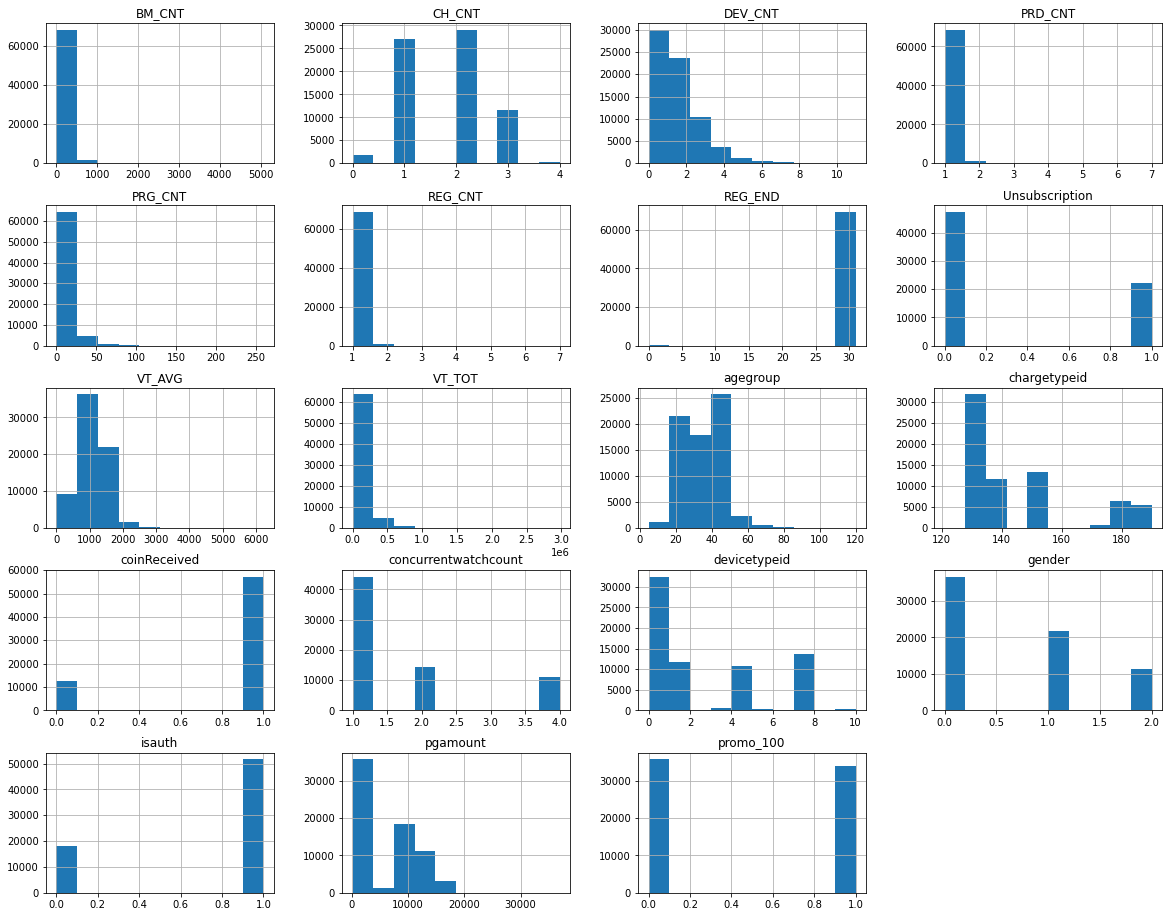

In [109]:
service_bookmark.hist(figsize=(20,16))
plt.show()

In [110]:
os.getcwd()

'C:\\Users\\2180033\\Desktop\\python_begins\\WAVVE'

## predict service data 가공

In [111]:
predict_service = pd.read_csv("Predict/predict_service.csv", parse_dates=['registerdate','enddate'], infer_datetime_format=True)
predict_bookmark = pd.read_csv("Predict/predict_bookmark.csv", parse_dates=['dates'], infer_datetime_format=True)

df_predict_service = predict_service.copy()
df_predict_bookmark = predict_bookmark.copy()

In [112]:
df_predict_service.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19001 entries, 0 to 19000
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   uno                   19001 non-null  object        
 1   registerdate          19001 non-null  datetime64[ns]
 2   enddate               19001 non-null  datetime64[ns]
 3   productcode           19001 non-null  object        
 4   pgamount              19001 non-null  float64       
 5   chargetypeid          19001 non-null  int64         
 6   concurrentwatchcount  19001 non-null  int64         
 7   promo_100             10019 non-null  object        
 8   coinReceived          3220 non-null   object        
 9   Repurchase            248 non-null    object        
 10  devicetypeid          19001 non-null  object        
 11  isauth                14219 non-null  object        
 12  gender                16056 non-null  object        
 13  agegroup        

In [113]:
df_predict_bookmark.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1973560 entries, 0 to 1973559
Data columns (total 11 columns):
 #   Column         Dtype         
---  ------         -----         
 0   uno            object        
 1   dates          datetime64[ns]
 2   hour           int64         
 3   channeltype    object        
 4   programid      object        
 5   title          object        
 6   contentid      object        
 7   contentnumber  object        
 8   section        object        
 9   viewtime       int64         
 10  devicetype     int64         
dtypes: datetime64[ns](1), int64(3), object(7)
memory usage: 165.6+ MB


In [114]:
predict_missing_info = pd.DataFrame(predict_service.isnull().sum().sort_values(ascending=False), columns=['missing num'])
predict_missing_info['%'] = predict_missing_info['missing num']/predict_service.shape[0]*100
predict_missing_info

,missing num,%
Repurchase,18753,98.694806
coinReceived,15781,83.053523
promo_100,8982,47.271196
isauth,4782,25.167096
gender,2945,15.499184
agegroup,0,0.000000
devicetypeid,0,0.000000
concurrentwatchcount,0,0.000000
chargetypeid,0,0.000000
pgamount,0,0.000000


In [115]:
# gender null --> N
df_predict_service['gender'] = df_predict_service['gender'].fillna('N')
df_predict_service['gender'].value_counts()

# agegroup outlier (0살, 950살) --> mean
df_predict_service['agegroup'].value_counts().sort_index()

age_mean = df_predict_service.loc[(df_predict_service['agegroup']<950) & (df_predict_service['agegroup']>0), 'agegroup'].mean()
age_mean

df_predict_service['agegroup'] = df_predict_service['agegroup'].replace(950, 30)
df_predict_service['agegroup'] = df_predict_service['agegroup'].replace(0, 30)
df_predict_service['agegroup'].value_counts().sort_index()

# pgamount US Dollar --> 원화
df_predict_service['pgamount'].value_counts().sort_index()

df_predict_service.loc[(df_predict_service['pgamount'] < 100), 'pgamount'] = df_predict_service['pgamount'] * 1120
df_predict_service['pgamount'].value_counts().sort_index()

# 나머지 결측치는 X로 처리 (O or null인 경우)
df_predict_service.isnull().sum()

df_predict_service = df_predict_service.fillna('X')
df_predict_service.isnull().sum()

uno                     0
registerdate            0
enddate                 0
productcode             0
pgamount                0
chargetypeid            0
concurrentwatchcount    0
promo_100               0
coinReceived            0
Repurchase              0
devicetypeid            0
isauth                  0
gender                  0
agegroup                0
dtype: int64

In [116]:
df_predict_service['Repurchase'].replace('O', 0, inplace=True)
df_predict_service['Repurchase'].replace('X', 1, inplace=True)
df_predict_service.rename(columns={'Repurchase':"Unsubscription"}, inplace=True)
df_predict_service.head(5)

column_list = df_predict_service.columns.values.tolist()
column_list.remove('uno')
column_list.remove('productcode')

for col in column_list:
    if df_predict_service[col].dtype == 'object':
        lbl = LabelEncoder()
        lbl.fit(list(df_predict_service[col].values))
        df_predict_service[col] = lbl.transform(df_predict_service[col].values)
        
df_predict_service.sample(5)

df_predict_service.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19001 entries, 0 to 19000
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   uno                   19001 non-null  object        
 1   registerdate          19001 non-null  datetime64[ns]
 2   enddate               19001 non-null  datetime64[ns]
 3   productcode           19001 non-null  object        
 4   pgamount              19001 non-null  float64       
 5   chargetypeid          19001 non-null  int64         
 6   concurrentwatchcount  19001 non-null  int64         
 7   promo_100             19001 non-null  int32         
 8   coinReceived          19001 non-null  int32         
 9   Unsubscription        19001 non-null  int64         
 10  devicetypeid          19001 non-null  int32         
 11  isauth                19001 non-null  int32         
 12  gender                19001 non-null  int32         
 13  agegroup        

## predict bookmark data 가공

In [117]:
# (1) 고객별 서비스 가입 이력 수
pd_feature_1 = df_predict_service.groupby(by='uno', as_index=False).registerdate.count()
pd_feature_1.rename(columns={'registerdate':'REG_CNT'}, inplace=True)

# (2) 고객별 서비스 가입 이력 상품 수
pd_feature_2 = df_predict_service[['uno','productcode']]
pd_feature_2 = df_predict_service.drop_duplicates() # 고객별 동일 상품 제거
pd_feature_2 = df_predict_service.groupby(by='uno', as_index=False).productcode.count()
pd_feature_2.rename(columns={'productcode':'PRD_CNT'}, inplace=True)

# (3) 고객별 시청 건수 (1시간 단위)
pd_feature_3 = df_predict_bookmark.groupby(by='uno', as_index=False).dates.count()
pd_feature_3.rename(columns={'dates':'BM_CNT'}, inplace=True)

# (4) 고객별 시청 총 시간
pd_feature_4 = df_predict_bookmark.groupby(by='uno', as_index=False).viewtime.sum()
pd_feature_4.rename(columns={'viewtime':'VT_TOT'}, inplace=True)

# (5) 고객별 시청 평균 시간
pd_feature_5 = df_predict_bookmark.groupby(by='uno', as_index=False).viewtime.mean()
pd_feature_5.rename(columns={'viewtime':'VT_AVG'}, inplace=True)

# (6) 고객별 시청 채널 수
pd_feature_6 = df_predict_bookmark[['uno','channeltype']]
pd_feature_6 = pd_feature_6.drop_duplicates() # 고객별 동일 채널 제거
pd_feature_6 = pd_feature_6.groupby(by='uno', as_index=False).channeltype.count()
pd_feature_6.rename(columns={'channeltype':'CH_CNT'}, inplace=True)

# (7) 고객별 시청 프로그램 수
pd_feature_7 = df_predict_bookmark[['uno','programid']]
pd_feature_7 = pd_feature_7.drop_duplicates() # 고객별 동일 프로그램 제거
pd_feature_7 = pd_feature_7.groupby(by='uno', as_index=False).programid.count()
pd_feature_7.rename(columns={'programid':'PRG_CNT'}, inplace=True)

# (8) 고객별 시청 디바이스 수
pd_feature_8 = df_predict_bookmark[['uno','devicetype']]
pd_feature_8 = pd_feature_8.drop_duplicates() # 고객별 동일 프로그램 제거
pd_feature_8 = pd_feature_8.groupby(by='uno', as_index=False).devicetype.count()
pd_feature_8.rename(columns={'devicetype':'DEV_CNT'}, inplace=True)

In [118]:
# (9) enddate - registerdate
pd_feature_9 = df_predict_service[['uno', 'enddate', 'registerdate', 'Unsubscription']]
pd_feature_9['REG_END'] = pd_feature_9['enddate'] - pd_feature_9['registerdate']
pd_feature_9 = pd_feature_9[['uno', 'registerdate', 'REG_END']]

pd_feature_9['REG_END'] = pd_feature_9['REG_END'].astype('str')
pd_feature_9['REG_END'] = pd_feature_9.REG_END.str.split(' days').str[0]
pd_feature_9['REG_END'] = pd_feature_9['REG_END'].astype('int')

<ipython-input-118-e00c156bf21c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pd_feature_9['REG_END'] = pd_feature_9['enddate'] - pd_feature_9['registerdate']


In [120]:
df_service_bookmark = df_predict_service.copy()
feature_list = [pd_feature_1, pd_feature_2, pd_feature_3, pd_feature_4, 
                pd_feature_5, pd_feature_6, pd_feature_7, pd_feature_8]

for feature in feature_list:
    df_service_bookmark = pd.merge(df_service_bookmark, feature, on=['uno'], how='left')
    
df_service_bookmark = pd.merge(df_service_bookmark, pd_feature_9, on=['uno', 'registerdate'], how='left')
    
print(df_service_bookmark.columns)
print(len(df_predict_service))
print(len(df_service_bookmark))
print(len(df_predict_service))

df_service_bookmark.isna().sum()

df_service_bookmark['BM_CNT'] = df_service_bookmark['BM_CNT'].fillna(0)
df_service_bookmark['VT_TOT'] = df_service_bookmark['VT_TOT'].fillna(0)
df_service_bookmark['VT_AVG'] = df_service_bookmark['VT_AVG'].fillna(0)
df_service_bookmark['CH_CNT'] = df_service_bookmark['CH_CNT'].fillna(0)
df_service_bookmark['PRG_CNT'] = df_service_bookmark['PRG_CNT'].fillna(0)
df_service_bookmark['DEV_CNT'] = df_service_bookmark['DEV_CNT'].fillna(0)

Index(['uno', 'registerdate', 'enddate', 'productcode', 'pgamount',
       'chargetypeid', 'concurrentwatchcount', 'promo_100', 'coinReceived',
       'Unsubscription', 'devicetypeid', 'isauth', 'gender', 'agegroup',
       'REG_CNT', 'PRD_CNT', 'BM_CNT', 'VT_TOT', 'VT_AVG', 'CH_CNT', 'PRG_CNT',
       'DEV_CNT', 'REG_END'],
      dtype='object')
19001
19001
19001


In [122]:
df_service_bookmark.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19001 entries, 0 to 19000
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   uno                   19001 non-null  object        
 1   registerdate          19001 non-null  datetime64[ns]
 2   enddate               19001 non-null  datetime64[ns]
 3   productcode           19001 non-null  object        
 4   pgamount              19001 non-null  float64       
 5   chargetypeid          19001 non-null  int64         
 6   concurrentwatchcount  19001 non-null  int64         
 7   promo_100             19001 non-null  int32         
 8   coinReceived          19001 non-null  int32         
 9   Unsubscription        19001 non-null  int64         
 10  devicetypeid          19001 non-null  int32         
 11  isauth                19001 non-null  int32         
 12  gender                19001 non-null  int32         
 13  agegroup        

In [123]:
print(service_bookmark.shape, df_service_bookmark.shape)

(69708, 23) (19001, 23)


In [124]:
service_bookmark.columns == df_service_bookmark.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

## 예측용 데이터

In [125]:
# X_predict = df_service_bookmark.drop(['uno', 'registerdate', 'enddate', 'Unsubscription', 'productcode'], axis=1)

## Train data 쪼개기

In [126]:
X = service_bookmark.drop(['uno', 'registerdate', 'enddate', 'Unsubscription', 'productcode'], axis=1)
y = service_bookmark['Unsubscription']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=47)

In [127]:
print(len(X_train), len(X_test))
print(len(y_train), len(y_test))

55766 13942
55766 13942


## Xgboost

In [128]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from xgboost import XGBClassifier

In [129]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score

In [130]:
#got the best parameters

param_grid = {
    'max_depth' : [3, 4, 5, 6],
    'learning_rate' : [0.3, 0.1, 0.05],
#     'gamma' : [0, 0.05, 0.4, 0.5],
#     'reg_lambda' : [0, 1, 10, 20],
    'scale_pos_weight' : [1, 3, 5]    
}

xgb_model = GridSearchCV(
    estimator=XGBClassifier(objective = 'binary:logistic',
                            subsample = 0.9,
                            colsample_bytree = 0.5),
    param_grid=param_grid,
    scoring='f1',
    verbose=2,
    n_jobs=10,
    cv=3
)

In [131]:
#got the best parameters above

xgb_model.fit(X_train, y_train, verbose=True)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  21 tasks      | elapsed:   41.0s
[Parallel(n_jobs=10)]: Done 108 out of 108 | elapsed:  2.4min finished


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.5, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=0.9,
                                     tree_method=None, v

In [132]:
xgb_model.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=3, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [133]:
best_xgb = xgb_model.best_estimator_
best_xgb

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=3, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=3, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

## Xgboost result

In [134]:
y_pred = best_xgb.predict(X_test)

In [135]:
print("f1 score: ", f1_score(y_test, y_pred), "\nAccuracy: ", accuracy_score(y_test, y_pred))

f1 score:  0.5419285604783075 
Accuracy:  0.571367092239277


f1 score:  0.537498090728578
Accuracy:  0.5656290345717975



In [136]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.47      0.60      9472
           1       0.41      0.79      0.54      4470

    accuracy                           0.57     13942
   macro avg       0.62      0.63      0.57     13942
weighted avg       0.69      0.57      0.58     13942



In [137]:
confusion_matrix(y_test, y_pred)

array([[4431, 5041],
       [ 935, 3535]], dtype=int64)

## enddate 30일 미만 답 바꾸기

In [141]:
len(X_test), len(y_pred)

(13942, 13942)

In [145]:
X_test.sample(5)

,pgamount,chargetypeid,concurrentwatchcount,promo_100,coinReceived,devicetypeid,isauth,gender,agegroup,REG_CNT,PRD_CNT,BM_CNT,VT_TOT,VT_AVG,CH_CNT,PRG_CNT,DEV_CNT,REG_END
38164,100.0,180,1,0,1,4,1,0,20,1,1,64.0,78320.0,1223.750000,1.0,6.0,2.0,31
59722,100.0,132,1,0,1,4,1,0,20,1,1,47.0,65180.0,1386.808511,2.0,8.0,3.0,31
67120,100.0,180,1,0,1,7,1,0,25,1,1,25.0,26540.0,1061.600000,2.0,3.0,1.0,31
24856,100.0,190,2,0,1,7,1,0,20,1,1,70.0,63850.0,912.142857,1.0,7.0,3.0,31
43001,11188.8,140,1,1,1,1,1,0,20,1,1,36.0,26140.0,726.111111,2.0,3.0,1.0,31


In [153]:
len(y_pred)

13942

In [218]:
y_pred_dataframe = pd.DataFrame(y_pred, columns=['y_pred'])
y_pred_dataframe = y_pred_dataframe.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)

merged_y_pred = pd.concat([X_test['REG_END'], y_pred_dataframe], axis=1)

# merged_y_pred = pd.merge(X_test['REG_END'], y_pred_dataframe, left_index=True, right_index=True)


In [219]:
merged_y_pred.head(5)

,REG_END,y_pred
0,31.0,NaN
1,31.0,1.0
2,31.0,0.0
3,0.0,NaN
4,31.0,NaN


In [220]:
len(merged_y_pred)

13943

In [170]:
merged_y_pred[merged_y_pred['REG_END'] < 30]

,REG_END,y_pred
2608,0,1
9009,1,0
7565,0,1
8749,0,1
11121,0,1
7725,0,1
3081,0,1
6149,0,0
12181,0,0
12156,6,1


In [ ]:
df.loc[df.grades>50,'result']='success'

In [171]:
merged_y_pred.loc[merged_y_pred.REG_END<30, 'y_pred'] = int(1)

In [172]:
merged_y_pred[merged_y_pred['REG_END'] < 30]

,REG_END,y_pred
2608,0,1
9009,1,1
7565,0,1
8749,0,1
11121,0,1
7725,0,1
3081,0,1
6149,0,1
12181,0,1
12156,6,1


In [197]:
y_pred = merged_y_pred['y_pred']

In [179]:
len(y_test), len(y_pred)

(13942, 2725)

In [178]:
print("f1 score: ", f1_score(y_test, y_pred), "\nAccuracy: ", accuracy_score(y_test, y_pred))

ValueError: Found input variables with inconsistent numbers of samples: [13942, 2725]

## 답안 Predict

In [ ]:
# 예측 모델에 최종 데이터 입력
y_pred = best_xgb.predict(X_predict)

# 데이터 건수 확인
print('예측 대상 건수 = ', len(X_predict), ', 예측 결과 건수 = ', len(y_pred))

In [ ]:
# 결과 제출 답안지 불러오기
df_sheet = pd.read_csv("Submission/CDS_submission.csv")
df_sheet.drop('CHURN', axis=1, inplace=True)
df_sheet.info()

In [ ]:
# 답안지에 답안 표기
df_result = df_service_bookmark.loc[:,('uno','registerdate','productcode')]
df_result['KEY']   = df_result['uno'] + '|' + df_result['registerdate'].dt.strftime('%y-%m-%d %I:%M:%S') + '|' + df_result['productcode']   # 판다스 strftime()
df_result['CHURN'] = pd.DataFrame(y_pred)
df_result = df_result.loc[:,('KEY','CHURN')]
df_answer_sheet = pd.merge(df_sheet, df_result, on='KEY', how='left')
df_answer_sheet.info()

## 답안지 제출 파일 생성하기

In [ ]:
ds_answer_sheet = "CDS_submission_후렌치파이_1차.csv"
df_answer_sheet.to_csv(ds_answer_sheet, index=False, encoding='utf8')

In [ ]:
df_answer_sheet

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [ ]:
for i in range(7, 30):
    dt_model = DecisionTreeClassifier(random_state=47, max_depth=i)
    dt_model.fit(X_train, y_train)
    y_pred = dt_model.predict(X_test)
    print("\nmax_depth: ", i, "\nf1 score: ", f1_score(y_test, y_pred), "\nAccuracy: ", accuracy_score(y_test, y_pred))

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
confusion_matrix(y_test, y_pred)

## code 데이터 읽기
  - content info
  - movie info

In [ ]:
df_content_info = pd.read_csv("Code/content_info.csv")
df_content_info.sample(3)

In [ ]:
df_movie_info = pd.read_csv("Code/movie_info.csv")
df_movie_info.sample(3)